<a href="https://colab.research.google.com/github/WinstonZheng8/Regression-Analysis/blob/main/RegressionAnalysisCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Update to our hypothesis:
After doing further analysis on the data that is available in this dataset, we decided to change the variables that are being used in our final model. This is because there is interaction between terms, tranformation towards specific columns had to be done, and some columns did not contribute to the overall model compared to other columns.

Old hypothesis: Females of a higher working age and who live in the Southwest tend to have higher medical costs.

New hypothesis: Individuals who are older, have higher BMI, have more children, and are smokers tend to experience significantly higher health insurance costs.


In [ ]:
install.packages("GGally")
install.packages("car")
install.packages("ggplot2")
install.packages("tidyverse")
library(tidyverse)
library(car)
library("GGally")
library("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks

In [ ]:
data <- read_csv("insurance.csv")
data$charges  <- log(data$charges) # model transformation
data$age <- exp(data$age)

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Model Building - Final Model (Trisha and Isiah)


Multicolinearity Analysis

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


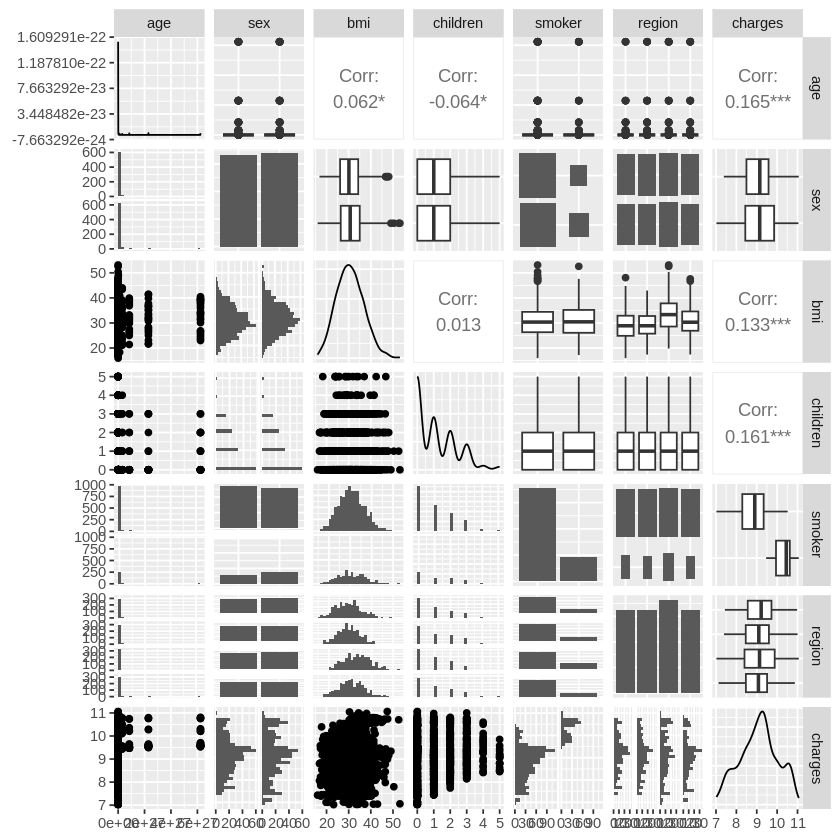

In [ ]:
ggpairs(data) + theme()

In [ ]:
#reduced model found from stepwise regression below
reduced <- lm(charges~age+bmi+children+smoker+ I(age^2)+I(bmi^2)+I(children^2)
            + age*smoker  + bmi*smoker + children*smoker
            ,data = data)
vif(reduced)

# model version with no interaction terms
individual_terms <- lm(charges ~ age + bmi + children + smoker, data = data)
vif(individual_terms)


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



age             bmi        children          smoker        I(age^2) 
      16.466194       58.805958        7.448077       26.257284       16.368430 
       I(bmi^2)   I(children^2)      age:smoker      bmi:smoker children:smoker 
      58.652928        6.905378        1.507342       25.506215        2.192873

age      bmi children   smoker 
1.009381 1.004174 1.004483 1.001317

Analysis: First we looked at the vif values for our final refused model, but the vif values are different when there are interaction terms or transformations being done. So we created a model called individual_terms, that does not contain any interaction terms. When running vif on that new model, all of the vif values are very close to 1. This means that there is no significant evidence that there is collinearity between the predictor variables.

Second order and interaction terms and model transformation

In [ ]:
# full model with first order, second order, and interaction terms
# model transformation is done above, where the data is read in
full <- lm(charges~age+bmi+children+smoker+ I(age^2)+I(bmi^2)+I(children^2)
            +age*bmi + age*children + age*smoker + bmi*children + bmi*smoker + children*smoker
            ,data = data)
null <- lm(charges ~ 1, data = data)
step_model1 <- step(full, scope = list(lower = null, upper = full),
                    direction = "both",test="F")

Start:  AIC=-1262.41
charges ~ age + bmi + children + smoker + I(age^2) + I(bmi^2) + 
    I(children^2) + age * bmi + age * children + age * smoker + 
    bmi * children + bmi * smoker + children * smoker

                  Df Sum of Sq    RSS     AIC F value    Pr(>F)    
- bmi:children     1    0.0128 510.06 -1264.4  0.0333 0.8552216    
- age:bmi          1    0.2831 510.33 -1263.7  0.7349 0.3914582    
- age:children     1    0.5352 510.58 -1263.0  1.3892 0.2387478    
<none>                         510.05 -1262.4                      
- age:smoker       1    3.8019 513.85 -1254.5  9.8691 0.0017180 ** 
- I(bmi^2)         1    4.4466 514.49 -1252.8 11.5427 0.0007003 ***
- I(children^2)    1    5.1106 515.16 -1251.1 13.2663 0.0002807 ***
- children:smoker  1    5.4850 515.53 -1250.1 14.2381 0.0001682 ***
- bmi:smoker       1   14.4018 524.45 -1227.2 37.3849 1.274e-09 ***
- I(age^2)         1   16.5344 526.58 -1221.7 42.9208 8.140e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

In [ ]:
# final reduced model
reduced <- lm(charges~age+bmi+children+smoker+ I(age^2)+I(bmi^2)+I(children^2)
            + age*smoker  + bmi*smoker + children*smoker
            ,data = data)
anova(full,reduced)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1324,510.0455,NA,NA,NA,NA
2,1327,510.8906,-3,-0.8451767,0.7313164,0.5333362


# Model Diagnostics (Trisha and Winston)

# Discussion of assumptions for the final model:

Linearity Assumption: Based on the scatterplot of the fitted vs residuals shown below, the linearity assumption is satisfied.

Constant Variance: Based on the scatterplot of the fitted vs residuals shown below, the constant variance assumption is satisfied.

Normality: Based on the histogram, box plot and QQ plot, the normality assumption is satsified. The Shapiro Wilk test output suggests that the normality assumption is not satisfied based on the p value, but since the other plots confirm the normality assumption, we decided to continue with our analysis.

Independence: Based on the DW test that is used to check for the independence assumption, we had to create a model that has no interaction terms. check_ind has all the variables we have in our final reduced model but we exclude the interaction terms. The p value for check_ind and the p value for our final reduced model both suggest that the independence assumption is satisfied.


Residual diagnostics of final model:

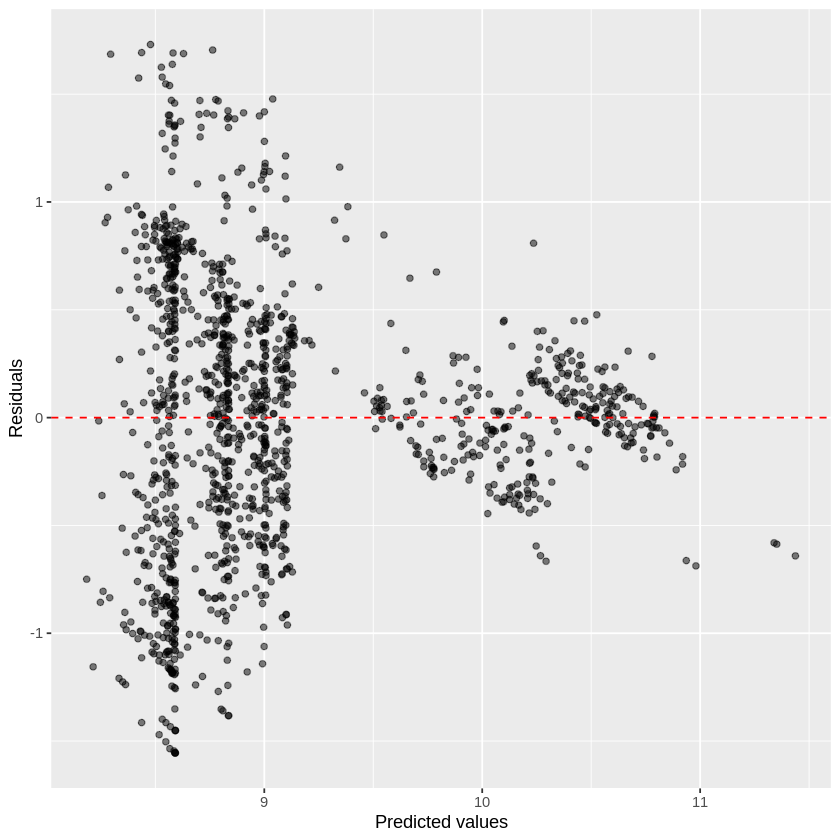

In [ ]:
# First/Second: Linearity check and constant variance:
ggplot(data = reduced, aes(x = .fitted, y = .resid)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(x = "Predicted values", y = "Residuals")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


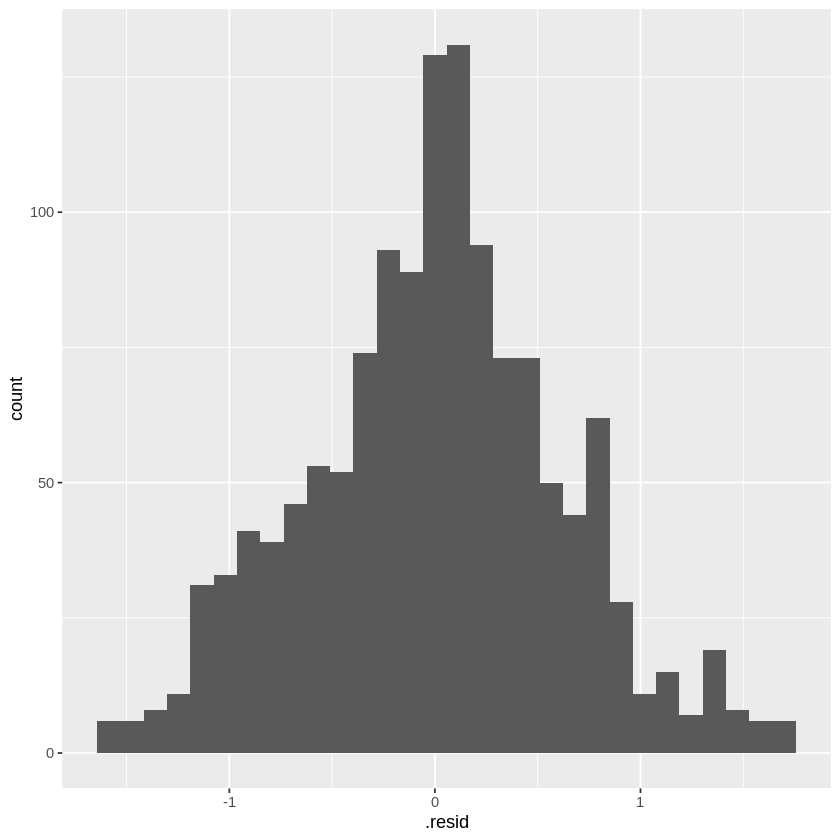

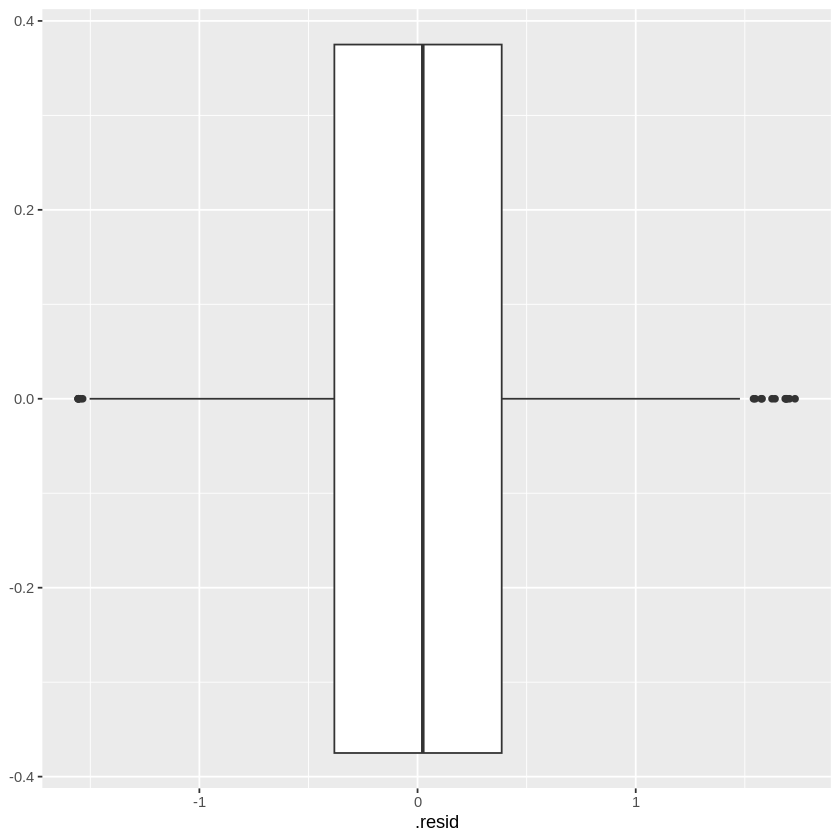


	Shapiro-Wilk normality test

data:  resid(reduced)
W = 0.99439, p-value = 6.363e-05


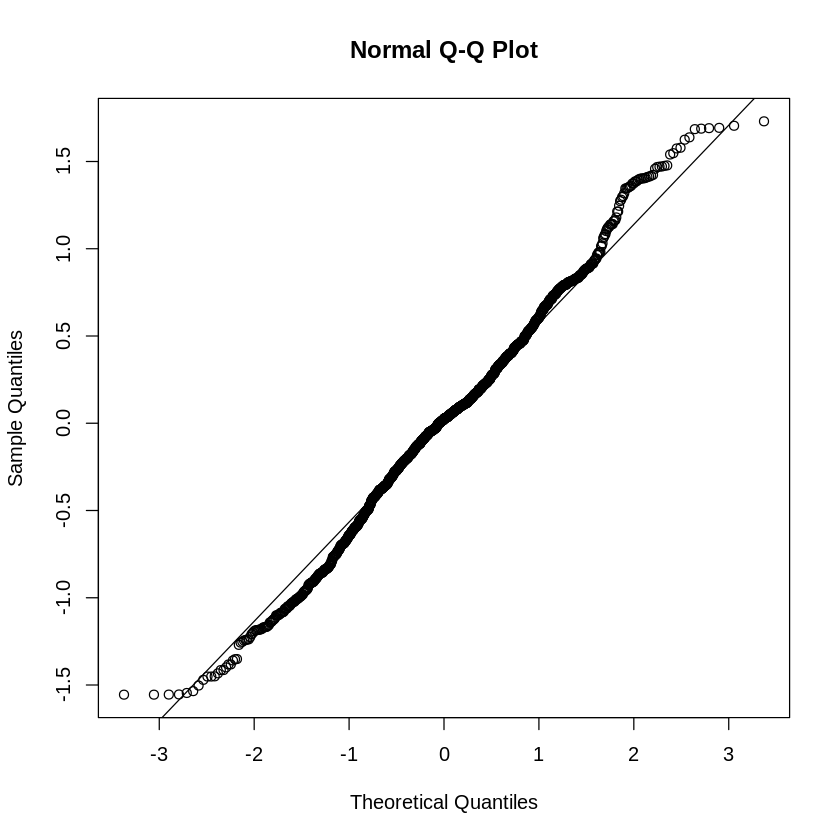

In [ ]:
# Fourth:Normality Check
ggplot(data = reduced, aes(x = .resid)) + geom_histogram()
ggplot(data = reduced, aes(x = .resid)) + geom_boxplot()
qqnorm(resid(reduced))
qqline(resid(reduced))
shapiro.test(resid(reduced))

In [ ]:
check_ind <- lm(charges ~ age + bmi + children + smoker , data = data)
set.seed(5)
dwt(reduced)
dwt(check_ind)

 lag Autocorrelation D-W Statistic p-value
   1     -0.01181926      2.023364    0.65
 Alternative hypothesis: rho != 0

 lag Autocorrelation D-W Statistic p-value
   1     -0.01230911      2.024375   0.644
 Alternative hypothesis: rho != 0

Considered but excluded models:

In [ ]:
full <- lm(charges~age+bmi+children+smoker+ I(age^2)+I(bmi^2)+I(children^2)
            +age*bmi + age*children + age*smoker + bmi*children + bmi*smoker + children*smoker
            ,data = data)

Using stepwise model selection, we were able to eliminate some of the terms from the full model shown above.

# Model Interpretation (Tristan and Winston)



In [ ]:
reduced <- lm(charges~age+bmi+children+smoker+ I(age^2)+I(bmi^2)+I(children^2)
            + age*smoker  + bmi*smoker + children*smoker
            ,data = data)

Interpretations and interesting findings from the model coefficients

Our most significant (largest coefficients) terms in the model were the number of children and smoker status. A change in one of these variables would result in a more significant change in the predicted values compared to the other variables. Additionally, there is a negative coefficient for bmi * smokeryes and children * smokeryes, suggusting that smokers with higher bmi and more children would have lower medical costs.

$x_{1} = e^{age}$

$x_{2} = bmi$

$x_{3} = children$

$x_{4} = smokeryes$

$\widehat{y} = estimated log(Insurance cost)$

$$ \widehat{y} =   7.209 + 7.312*10^{-28}x_{1}   +  7.312*10^{-28}x_{2} + 2.813*10^{-01}x_{3} + 4.246*10^{-01}x_{4} -9.285*10^{-56} x_{1}^{2}   -1.135*10^{-03}x_{2}^{2}  -3.667*10^{-02}x_{3}^{2} - 1.316*10^{-28}x_{1}* x_{4} + 4.092*10^{-02}x_{2}* x_{4} -1.386*10^{-01} x_{3}* x_{4}$$






```
# This is formatted as code
```

Final model output with interpretations

For every unit increase in the value of e^age(x1), the log mean insurance cost is estimated to increase by 3.985∗10^−28 For every unit increase in the value of bmi(x2), the log mean insurance cost is estimated to increase by 9.036∗10^−3 For every unit increase in the value of number of children(x3), the log mean insurance cost is estimated to increase by 0.1507. Smoking(x4) is categorical data with smoker(1) and nonsmoker(0), the log mean insurance cost is estimated to increase by 0.4048 when comparing smokers and nonsmokers.

The model shows the effect age has with bmi, with every unit increase in e^age*bmi, the log mean insurance costs are estimated to decrease by 5.67210^−30. Similarily, the model implies that a one unit increase of e^age*smokeryes results in a, decrease by 1.706∗10^−28. A one unit increase in bmi*smokeryes results in a decrease in log of medical costs by 4.130∗10^−2. The interaction between children and smoking results in a -1.27610^-1 unit decrease in log of medical costs for every one unit increase in children*smokeryes.




Limitations of final model

Some limitations to the final model include exclusivity of second-order terms; choosing to not go beyond the second order and having a limited amount of interactions; 2 interactions.